# Evolução e propagação temporal da função de onda

* PET - Física UFRN
* Petiano: Gabriel Wendell Celestino Rocha
* Data: 04 de Novembro de 2020

O objetivo deste `Notebook` é analisar, numericamente, a **evolução** e a **propagação** da função de onda no **tempo**. Por questões de didática e de organização, este `Notebook` foi dividido em duas partes. Na parte 1, resolveremos o problema do poço quadrado infinito e faremos uma evolução temporal da função de onda. Na parte 2, iremos ver como propagar uma função de onda no tempo.

## Pré-requisitos

Recomenda-se ao leitor ser conhecedor do problema do [**poço quadrado infinito.**](https://phys.libretexts.org/Courses/University_of_California_Davis/UCD%3A_Physics_9HE_-_Modern_Physics/03%3A_One-Dimensional_Potentials/3.2%3A_Infinite_Square_Well) [3]. (ou *infinite square well* em inglês) que será extensivamente abordado na parte 1. Para o leitor interessado em uma análise alternativa do problema, recomeda-se a leitura do artigo *Reexamination on the problem of the infinite square well in quantum mechanics.* (você pode consultá-lo na referência [4] ou cliando [aqui](https://www.researchgate.net/publication/275833592_Reexamination_on_the_problem_of_the_infinite_square_well_in_quantum_mechanics)). Além disso, subtende-se que o leitor também seja conhecedor das ferramentas computacionais usadas na resolução da equação de Schrödinger (você pode consultar um `Notebook` sobre o assunto na referência [5] ou clicando [aqui](https://github.com/GabrielWendell/PET/blob/master/Notebooks/Resolvendo%20numericamente%20a%20equa%C3%A7%C3%A3o%20de%20Schr%C3%B6dinger.ipynb)) que serão necessárias para o entendimento do que será abordado na parte 2.

$\text{ }$

## 1. Resolvendo o problema do poço quadrado infinito

Aqui, exploraremos a função de onda à medida que a mesma evolui no tempo, para alguma função genérica como o estado inicial. Portanto, ao invés de realizarmos uma análise matemática para determinar as constantes $c_{n}$, iremos realizar o mesmo de forma numérica através de métodos computacionais. Neste `Notebook`, presume-se que a solução para a equação de Schrödinger seja conhecida ou previamente determinada [5].

As soluções padrão para o problema do quadrado infinito, no domínio $0<x<a$, são dadas por: 

$$<x|\psi_n>=\psi_n(x) = \sqrt{\frac{2}{a}} \sin\left(\frac{n\pi x}{a}\right)$$

$$E_n = \frac{n^2 \pi^2 \hbar^2}{2ma^2}$$

Para esse problema, temos alguma função de onda inicial dada por $\Psi(x,t=0)$. Desejamos determinar os coeficientes $c_{n}$, que pode ser feito com o auxílio da seguinte relação:

$$c_n=<\psi_n|\Psi(t=0)>= \int_0^a \psi_n(x) \Psi(x,t=0) dx$$

Nesse caso, teremos que resolver a integral acima numericamente, de modo que funcione para qualquer função de onda $\Psi(x,0)$.

Uma possível pergunta que pode surgir na mente do leitor é a seguinte: *como nós a integramos?* Como de costume, nesses tipos de problemas existem várias maneiras de realizar tal tarefa, e a diferença será determinada pelas informações disponíveis para o *input* (no caso, seriam as informações de entrada), a velocidade de execução e a precisão presente no resultado obtido. Alguns possíveis métodos são os seguintes:

### Método 1 - Soma direta (ou método do trapézio)

Neste método podemos siplesmente resolver a integral tratando-a como uma soma. Para situações em que as funções de onda $\psi_{n}(x)$ não são conhecidas matematicamente, mas apenas numericamente, esta seria a única escolha. Isso é o que seria feito caso também fosse resolvida a equação de Schrödinger numericamente. Se escolhermos um grande número de valores $N$ no intervalo de integração, teriamos uma boa precisão no resultado; no entanto, não seria otimamente eficiente se conhecermos a forma funcional de $\psi_{n}(x)$.

Para este método, o que fazemos é:

$$c_{c}=\int_{0}^{a}\psi_{n}(x)\Psi(x,t=0)dx\implies\frac{a}{N}\sum_{n=0}^{N}\psi_{n}(x_{i})\Psi(x_{i},0);\text{ }\text{ }x_{i}=\frac{na}{N}$$

Note que é necessário realizar essa soma cerca de $N$ vezes para obter todos os $c_{n}$ necessários para obter a mesma precisão da integral acima. Em outras palavras, isso significa dizer que o algoritmo leva $N\times N$ computações, o que pode reduzir significativamente a velocidade de execução do código.

### Método 2 - SciPy

Há um método interessante para lidar com esse tipo de problema na biblioteca do `Scipy` (clique [aqui](https://docs.scipy.org/doc/scipy/reference/) para checar a documentação do `Scipy`) que realiza a integração e cuida de todas as possíveis dores de cabeça que possam surgir, como o valor que devemos escolher para $N$. Podemos dizer à biblioteca o quão preciso queremos o resultado, ou seja, podemos dizer se desejamos que ele seja mais rápido ou mais preciso. O método é parte da função `scipy.integrate` e é chamado `quad(func,low,hi)`(clique [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) para mais informações sobre essa função em específico).

### Método 3 - Transformada Rápida de Fourier (FFT)

Como as funções $\psi(x)$ são funçoes seno, podemos realizar os cálculos como uma transformada rápida de Fourier [6]. De certa forma, isso é próximo ao Método 1, exceto pelo fato de que agora podemos fazer uso de algoritmos computacionais muito mais rápidos, o que reduzirá o número de cálculos para $N\ln{(N)}$ vezes, o que é *muito* melhor. A única desvantagem em desse método é que o mesmo só funcionará bem para o problema do poço quadrado infinito e que, devido à FFT (*Fast Fourier Transform*), o que de fato está acontecendo se torna um tanto quanto obscurecido.

Neste `Notebook`, optaremos por desenvolver o Método 2 como escolha para o problema em questão, principalmente pelo fato de que o mesmo é mais universal e (ao meu ver) mais claro do que o Método 3.

### Importando as bibliotecas

Como este `Notebook` será dividido em duas partes, algumas bibliotecas serão usadas somente na parte 1 e outras somente na parte 2 como está sinalizado abaixo. Nas que não possuírem algum tipo de aviso, subtende-se que elas serão usadas em ambas as partes:

In [2]:
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.pyplot as plt
import scipy.integrate as spi       # somente na parte 1
import scipy.fftpack as fft         # somente na parte 2
import scipy.linalg as scl          # somente na parte 2
import numpy as np
import math                         # somente na parte 2.

# Para que essa cell-magic (ou inline-magic) funcione 
# corretamente, execute essa célula duas vezes.
%matplotlib notebook

Vamos usar também uma magic extension `%version_information` do `IPython` para gerar um quadro com as informações sobre quais versões das bibliotecas que foram usadas para executar este `Notebook`. Você pode instalar a extensão `%version_information` usando o `pip` executando o seguinte comando no CMD :

`pip install version_information`

In [3]:
%load_ext version_information
%version_information matplotlib, IPython, Scipy, Numpy

AttributeError: module 'cgi' has no attribute 'escape'

Software versions
Python 3.8.6 64bit [GCC 10.2.1 20200723 (Red Hat 10.2.1-1)]
IPython 7.12.0
OS Linux 5.8.16 200.fc32.x86_64 x86_64 with glibc2.2.5
matplotlib 3.2.2
IPython 7.12.0
Scipy 1.4.1
Numpy 1.18.4
Tue Nov 03 20:49:15 2020 -03

Dada essa explicação, vamos ao código..

Agora desejamos programar a nossa função de onda inicial. Vamos pegar a seguinte função de onda:

$$\Psi (x,0)=A'x \text{ ; }x\in\Big[0,\frac{a}{2}\Big]$$

$$\Psi (x,0)=A'(a-x)\text{ ; }x\in\Big[\frac{a}{2},a\Big]$$

Um pequeno problema com essa função de onda, do ponto de vista do programa, é que ela possui uma descontinuidade em $x=\frac{a}{2}$. Ela também possui uma descontinuidade nos pontos em que $x=0$ e $x=a$. Uma forma de tratarmos com esse problema seria concordar em nunca chamar nossa função fora do intervalo $[0,a]$. A maneira "normal" de implementar esta função seria:

In [4]:
def f_slow(x,a):
    norm = np.sqrt(12./(a*a*a))
    
    if x < a/2:
        return (norm*x)
    else:
        return (norm*(a-x))

Podemos executar um teste rápido para garantir que o *output* (no caso, as informações de saída) faz sentido. Note que se escrevermos "12" ao invés de "12.", então obteremos apenas zeros como *output*. Em outras palavras, é necessário ter certeza que se está usando um ponto flutuante (ou *floating point*).

In [5]:
print(f_slow(0,10.),f_slow(3,10),f_slow(5,10),f_slow(7,10),f_slow(10,10))

0.0 0.3286335345030997 0.5477225575051661 0.3286335345030997 0.0


O único problema presente em nossa função é que não podemos chamá-la usando um array como argumento, em outras palavras, se escrevermos:

`print(f_slow([0,3.,5.,7.,10.],10.))`,

nossa função apresentará erro e irá, consequentemente falhar. Uma maneira de contornar tal problema é usar a função `np.piecewise` (clique [aqui](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.piecewise.html) para checar a documentação), que pode cuidar das condições em uma função por partes. Dessa forma, obtemos:

In [6]:
def f(x,a):
    norm = np.sqrt(12./(a*a*a))
    return (np.piecewise(x,[x<a/2.,x>=a/2.],
                           [lambda x: norm*x,
                           lambda x: norm*(a-x)]))

Vamos realizar um teste rápido para verificar se obtemos o resultado que desejamos:

In [7]:
print(f(np.array([0,3,5,7,10],dtype=float),10))

[0.         0.32863353 0.54772256 0.32863353 0.        ]


Em seguida, definimos a nossa função de onda $\psi_{n}(x)$, que é bastante direta:

In [8]:
def psi_n(x,n,a):
    return (np.sqrt(2./a)*np.sin(n*x*np.pi/a))

**OBS:** Poderiamos também, caso fosse escolha do leitor, usar uma função de onda inicial alternativa que nos daria um bom comportamento oscilatório. A função em questão seria:

`def f(x,a):`

    norm = 1./np.sqrt(2)

    return(norm*(psi_n(x,1,a)+psi_n(x,2,a)))

Vamos criar uma função para melhorar um pouco a estética dos nossos plots.

In [9]:
def opt_plot():
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,
                    labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,
                    labelsize=15)

Agora vamos ao nosso primeiro plot...

<IPython.core.display.Javascript object>


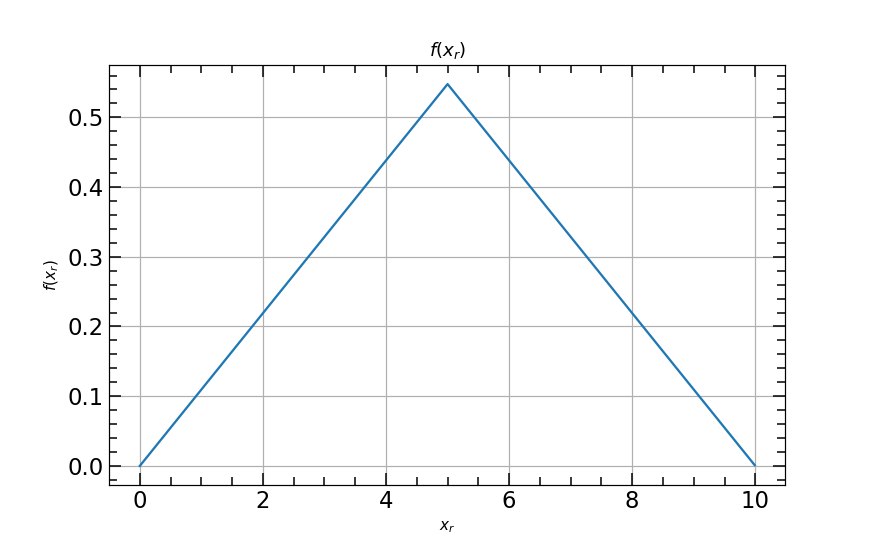

In [10]:
x_r = np.arange(0,10,0.01)

plt.figure(figsize=(8,5))
plt.plot(x_r,f(x_r,10))
plt.title(r'$f(x_{r})$')
plt.xlabel(r'$x_{r}$')
plt.ylabel(r'$f(x_{r})$')
plt.grid()
opt_plot()

plt.savefig('f(x_r).png')

Agora podemos calcular a constante $c_{n}$. Primeiramente, escrevemos uma função básica `ccc` que multiplica a função de onda $\Psi(x,t=0)$ com $\psi_{n}(x)$ para um $n$ específico. Em seguida, determinamos o coeficiente $c_{n}$ integrando `ccc` de 0 até $a$.

In [11]:
def int_fun(x,n,a):
    return (f(x,a)*psi_n(x,n,a))

def c(n,a):
    if n==0 or n%2==0:  # Se sabemos que os n pares são zeros, adicione: "or n%2==0"
        return (0)
    
    return (spi.quad(int_fun,0,a,args=(n,a),limit=100)[0])

Como realizar essa integração a cada vez é um processo muito lento, podemos pré-calcular os valores de $c_{n}$ e armazená-los em uma grande lista. Como $c_{39}$ já é bastante diminuto, podemos parar.

In [12]:
Nmax=40                  
a_1 = 10.               # Largura do poço.
a_step = 10./100.       
nl = np.array(range(Nmax))
cx = np.array([c(n,10.) for n in nl])

print(cx[0],cx[1],cx[2],cx[3],cx[4])
print(np.sum(cx*cx),cx[Nmax-1])

0.0 0.9927408002342286 0.0 -0.11030453335935887 0.0
0.9999974367055641 -0.0006526895465042513


$\textbf{OBS:}^{1}$ Em `Nmax`, note que quanto mais alto for o corte, mais preciso ele será. Entretanto, maior precisão, nesse caso, também significa maior tempo de execução do código.

$\textbf{OBS:}^{2}$ Uma pergunta que o leitor pode acabar se fazendo na hora de definir o `a_step` é: *Quão grande é o passo em x?* Bom, lembre-se que quanto menor o passo, mais preciso será o seu resultado.

A partir deste ponto, podemos simplesmente seguir o que fizemos anteriormente, quando possuíamos uma função simples para $c_{n}$. Observe que os gráficos adiante são idênticos ao que encontramos anteriormente (Figure 1), portanto, ao que tudo indica, este método de fato funciona.

Vamos escrever então uma função que codifica a própria função de onda dependente do tempo. Para realizar tal tarefa, primeiro precisamos de uma outra função que retorne a energia do sistema. Podemos simplificar um pouco as coisas escolhendo $m=1$ e $\hbar=1$, que essencialmente é uma escolha de unidades. Passamos então o valor da largura do poço, $a$.

Nossa primeira versão dessa função é bastante simples, mas como chamamos essa função várias vezes para realizar (experiemte fazer os plots usando essa função antes de implementar a parte seguinte do código), nota-se que a redução na velocidade de execução se torna perceptível. O tempo gasto para realizar os plots é de cerca de 2 minutos. Uma versão mais rápida dessa função está escrita logo abaixo, que em sua cerne realiza as mesmas coisas, mas usa os aceleradores Numpy (*Numpy speedups*). Esta versão realiza as plotagens em cerca de 2 segundos em meu sistema.

In [13]:
def E(n,a):
    return(n*n*np.pi*np.pi/(2.*a*a))       # Aqui definimos m/hbar = 1 

def psi_f(x,t,a):
    norm =np.sqrt(2/a)
    out = 0
    n_r = np.array(range(Nmax))
    out = cx*norm*np.sin(x*n_r*np.pi/a)*np.exp(-1.j*E(n_r,a)*t)
    s = np.sum(out)
    
    return(s)

Abaixo criamos os gráficos da parte real da função de onda, para ver como se dá a sua evolução. Observe que, como esta é apenas a parte real, não se espera que tais gráficos permaneçam normalizados. Em seguida, fazemos o mesmo para a parte imaginária da função de onda e, finalmente, o absoluto da função de onda. Nesse último conjunto de gráficos, a norma das curvas permanece igual a um.

<IPython.core.display.Javascript object>


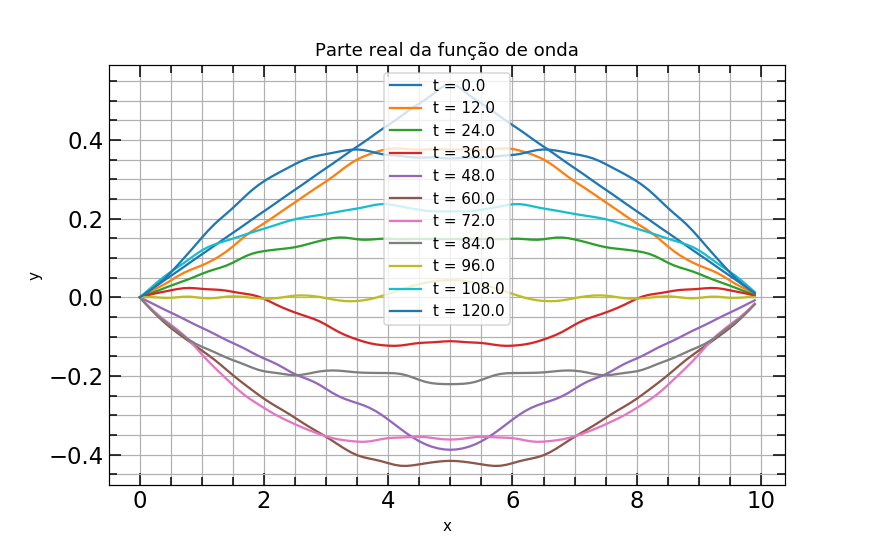

In [14]:
x_r = np.arange(0,10.,.1)
plts = []

plt.figure(figsize=(8,5))

for t in np.arange(0.,128.,12.):
    y_p = [np.real(psi_f(x,t,10.)) for x in x_r]
    pp=plt.plot(x_r,y_p,label="t = {}".format(t))
    plt.title("Parte real da função de onda")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc = 'best')
    plt.grid(True,which='both')
    plts.append(pp)
    opt_plot()
    
    plt.savefig('Parte real da função de onda.png')

Nosso plot final ficou bem interessante, entretanto, eu gostaria de que o plot fosse um tanto quanto mais, interessante. Esse plt é um tanto quanto antiquado, então vamos realizá-lo como uma animação.

O fato é que essa não é uma tarefa difícil de se realizar em Python, e mesmo em um `Notebook` Python, entretanto elas não funcinam como um PDF. Portanto, o seguinte só funcionará se o leitor carregar o `Notebook` em seu próprio computador e, em seguida, executar as células.

Um detalhe interessante a se pensar é: *por quanto tempo isso precisa ser executado?* Em outras palavras, *quando o vídeo se repetirá?* Se analisarmos a solução para a equação de Schrödinger completa, notaremos que cada $n$ termo rotaciona no espaço complexo com $-\frac{E_{n}t}{\hbar}$, e como todas as energias acima do estado fundamental são inteiros (ao quadrado), faremos o filme se repetir quando

$$\frac{E_{1}t}{\hbar}=2\pi\implies t=\frac{2\pi\hbar}{E_{1}}=2\pi\hbar\frac{2ma^{2}}{\pi^{2}\hbar^{2}}\implies t=\frac{4ma^{2}}{\pi\hbar}$$

Para a largura fornecida, obtemos:

In [15]:
print("a = {:4.1f} then T = {:8.3f}".format(10.,4*10.**2/np.pi))

a = 10.0 then T =  127.324


**OBS:** Para que a animação seja executada com sucesso, é necessário ter instalado o FFmpeg em sua máquina. Caso você não saiba onde baixar as builds do FFmpeg, basta clicar [aqui](https://ffmpeg.org/download.html).

In [16]:
T = 4*10.**2/np.pi
fig = plt.figure(figsize=(10,8))                   # Configure a imagem
ax = plt.axes(xlim=[0,10.],ylim=[-0.7,0.7])        # Congigure os eixos.

# Em seguida, definimos a linha a traçar, a largura da linha será 5 (lw = 5) e a cor, vermelha (color = 'red')
line, = ax.plot(x_r,np.zeros(len(x_r)),lw=5,color="red")

def animate(t):                                     # Atualiza a linha para t.
    y_p = [np.real(psi_f(x,t,10.)) for x in x_r]    # Computamos a data.
    line.set_data(x_r,y_p)                          # Congigura a data na linha
    line.set_color((t/T,1. - t/T,0))                # Anime a cor com t
    return (line,)                                  # Retorna a linha como uma tupla (line,)

def init():
    line.set_data([],[])                            # Apenas uma linha em branco
    return (line,)

# Em seguida, chamamos a função de animação. Isso basicamente faz todo o trabalho, entretanto
# em um Notebook do Jupyter, ela não estará visivelmente em movimento.
# Aqui animamos q00 quadro de 0 a T e depois repetimos o processo.
ani = animation.FuncAnimation(fig, animate, np.linspace(0.,T,100), init_func=init,
                              interval=100, blit=True)
HTML(ani.to_html5_video())                          # Isto diz: incorpore a animação como um vídeo.

<IPython.core.display.Javascript object>

RuntimeError: Requested MovieWriter (ffmpeg) not available

<IPython.core.display.Javascript object>


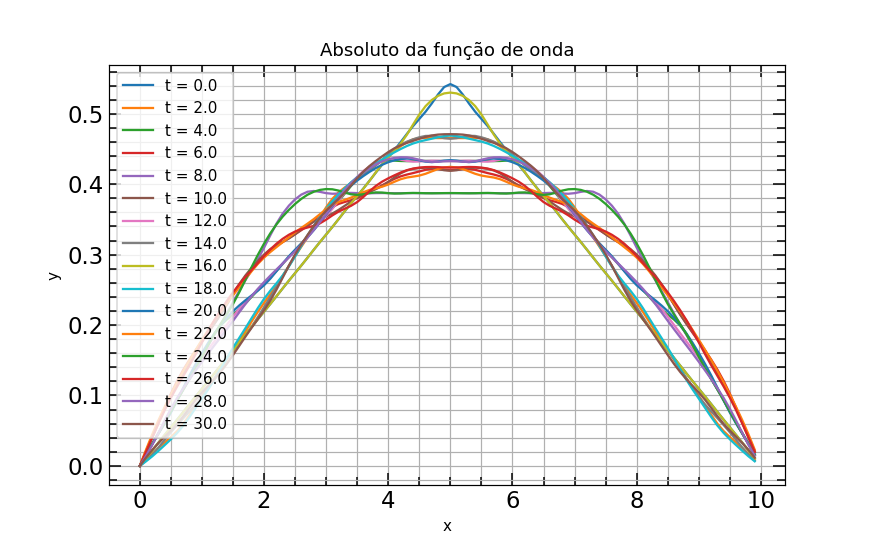

In [17]:
x_r = np.arange(0,10,0.1)

plt.figure(figsize=(8,5))

for t in np.arange(0.,32.,2.):
    y_p = [np.abs(psi_f(x,t,10.)) for x in x_r]
    plt.plot(x_r,y_p,label="t = {}".format(t))
    plt.legend() 
    plt.title("Absoluto da função de onda")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True,which='both')
    opt_plot()

Note que nossos plots estão bem condizentes com o esperado. Dessa forma, podemos partir para analisar como se dá a propagação da função de onda no tempo.

$$\text{ }$$

## 2. Propagação temporal da função de onda

Para os métodos de espalhamento que geralmente são examinados durante as aulas de Física Moderna ou de Introdução à Mecânica Quântica, os métodos mostrados na referência [[5](https://github.com/GabrielWendell/PET/blob/master/Notebooks/Resolvendo%20numericamente%20a%20equa%C3%A7%C3%A3o%20de%20Schr%C3%B6dinger.ipynb)] para resolver as equações de Schrödinger não são ideais. O leitor *pode* resolver os problemas de espalhamento dessa forma, essencialmente em um grande poço quadrado infinito (como foi mostrado até aqui), ao qual se adiciona uma barreira de espalhamento. O problrma que surge é que as soluções não são muito precisas e se tornam cada vez menores à medida que nos afastamos do ponto $t=0$. 

Existe uma maneira diferente de se pensar sobre o problema. Podemos resolver, numericamente, a equação de Schrödinger **dependente** do tempo, e então evoluir nossa função de onda inicial no tempo. 

Vamos começar com a equação completa:

$$i\hbar\frac{\partial\Psi}{\partial t}=\text{op }H\Psi$$

Caso o leitor não soubesse que $\text{op }H$ representa um operador, mas o tratasse apenas como um número, então a solução seria encontrada com relativa facilidade através de uma integração. Acontece que isso pode ser feito com um operador da mesma forma. Então, a solução assume a seguinte forma:

$$\Psi(x,t+\Delta t)=e^{\frac{-i\text{ op }H\Delta t}{\hbar}}\cdot\Psi(x,t)$$

Dessa forma, o "operador de evolução temporal" é dado por:

$$\newcommand{\op}[1]{\text{#1}}$$

$$\text{op }U(\Delta t)=e^{\frac{-i\text{ op }H}{\hbar}}$$

O expoente de um operador pode ser tratado usando uma série infinita, logo:

$$e^{\frac{-i\text{ op }H\Delta t}{\hbar}}=\sum_{n}\frac{\Big(\frac{-i\text{ op }H\Delta t}{\hbar}\Big)^{n}}{n!}$$

Caso o leitor tente avaliar numericamente, notará que diverge muito rapidamente da reposta correta, para qualquer tamanho apreciável de $\Delta t$, portanto, para uma avaliação *numérica*, é necessário ter $\Delta t<\frac{2}{\lambda_{\text{máx.}}}$, onde $\lambda_{\text{máx.}}$ é o maior nível de energia do Hamiltoniano. A razão é sútil e um tanto quanto complicada mas pode ser encontrada na referência [[7](https://e-maxx.ru/bookz/files/numerical_recipes.pdf)]. Caso o leitor deseje tomar um $\Delta t$ maior, os erros no cálculo irão se acumular tão rapidamente que esta abordagem não se torna prática se tentarmos avaliá-la diretamente desta forma. Nota-se também que está não é uma maneira rápida de avaliar um intervalo de tempo, uma vez que a multiplicação da matriz possui uma quantidade de operções da ordem de $N^{2}$.

### Configurando o Halmitoniano

Configuramos o hamiltoniano assim como foi feito no `Notebook` "[Resolvendo numericamente a equação de Schrödinger](https://github.com/GabrielWendell/PET/blob/master/Notebooks/Resolvendo%20numericamente%20a%20equa%C3%A7%C3%A3o%20de%20Schr%C3%B6dinger.ipynb)" (consultar referência [5]). Uma diferença é que precisaremos ser um pouco mais cuidadosos aqui com o nosso espaço x (*x-space*). Desejamos ter certeza que o nosso espaço x tenha exatamente $N$ passos contidos nele, para que possa ser possível ir de $x_{0}$ até $x_{N}$ em exatamente $N$ passos. Isso pode ser facilmente feito criando um intervalo $n$ que vai de 0 até $N$ e, em seguida deixando $x_{n}=x_{0}+n\Delta x$, com $\Delta x =\frac{(x_{N}-x_{0})}{N}$. Em outras palavras, isso significa dizer que obtemos arrays com valores de $N$, mas nunca chegamos a $x_{N}$.

Para fins de otimizarmos a FFT (consulte a referência [6] para mais informações) tornando-a mais rápida, mais adiante, definiremos $N$ como sendo uma potência de 2. Vamos agora definir os parâmetros de entrada (*inputs*):

In [18]:
hbar = 1
m = 1
N = 2**12        # FFT é muito mais rápida em domínios com potências de 2. 
a = 400.0
step_low = 0.
step_high= 1.
V0 = 10.

Agora definimos o espaço:

In [19]:
n = np.arange(N)
x0 = -a/2.
xN = a/2.
Delta_x = (xN - x0)/N
print("Delta_x = ",Delta_x)

x = x0 + n*Delta_x  # Aqui criamos a matriz correta de valores de x. 

Delta_x =  0.09765625


Agora vamos a definir o potencial:

In [20]:
V = np.zeros(N)
for i in range(N):
    if x[i]>= step_low and x[i]<= step_high:
        V[i]= V0

Configuramos o Hamiltoniano para a função `V`:

In [21]:
Mdd = 1./(Delta_x**2)*(np.diag(np.ones(N-1),-1) 
                       - 2* np.diag(np.ones(N),0) 
                       + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 

En,psiT = np.linalg.eigh(H) # Aqui calcumamos o autovalores e os autovetores.
psi = np.transpose(psiT)    # Tomamos a transposta de psiT para os vetores de função de onda
                            # que podem ser acessados como psi[n]

### Definindo o intervalo de tempo

Aqui precisamos ter cuidado com o quão grande é o passo que damos no tempo. Algo que pode ser encontrado no livro citado na referência [7] é que é necessário ficar abaixo de $\Delta t=\frac{2}{\lambda_{\text{máx.}}}$, onde $\lambda_{\text{i}}$ são os autovalors da matriz, no nosso caso $\text{op }H$. Isso é fácil uma vez que encontramos os autovalores.

In [22]:
dt_max = 2/np.max(En)      # Critério de estabilidade.
dt = 0.001
if dt > dt_max:
    print("ATENÇÃO: dt está na região instável!")

### Definindo a função de onda inicial a ser propagada

In [23]:
g_x0=-10.
g_k0=6.
g_sig=2.

Agora vamos definir um Gaussiano no espaço k (*k-space*), onde $p=\hbar k$, com um momento $k_{0}$, e o espaço x, $\psi(x,0)=\big(\frac{2a}{\pi}\big)^{1/4}\cdot e^{-ax^{2}}$:

In [24]:
def psi0(x,g_x0,g_k0,g_sig):
    _Norm_x=np.sqrt(Delta_x/g_sig)/(np.pi**0.25)
    return(_Norm_x*np.exp(-(x-g_x0)**2/(2.*g_sig*g_sig)+1j*g_k0*x))

psi_t0 = psi0(x,g_x0,g_k0,g_sig)

Caso o leitor esteja interessado, uma definição alternativa poderia ser feita da seguinte forma:

`def phi(k,g_k0,g_x0,g_sig):` 

    _Norm_k=np.sqrt(g_sig*Delta_k)/(np.pi**0.25)

    return(_Norm_k*np.exp(-0.5*g_sig*g_sig*(k-g_k0)**2-1j*g_x0*(k-g_k0)))

### Avaliação direta da exponencial

Vamos tentar avaliar a equação

$$e^{\frac{-i\text{ op }H\Delta t}{\hbar}}=\sum_{n}\frac{\Big(\frac{-i\text{ op }H\Delta t}{\hbar}\Big)^{n}}{n!}$$

diretamente, levando em consideração a condição para a estabilidade da equação diferencial (veja 17.5.20 na referência [7]).

Primeiramente, vamos realizar um teste básico para garantir que o nosso Hamiltoniano seja realmente Hermetiano:

In [25]:
# H é Hermitiano?
print("Verifique se H é realmente Hermitiano : ",np.array_equal(H.conj().T,H)) 

Verifique se H é realmente Hermitiano :  True


In [26]:
Ut_mat = np.diag(np.ones(N,dtype="complex128"),0)

print("Criação de uma matriz U(dt = {})".format(dt))
for n in range(1,3):  
    # Realiza a soma. Como se trata de matrizes, o processo irá demorar se N for grande.
    Ut_mat += np.linalg.matrix_power((-1j*dt*H/hbar),n)/math.factorial(n)

Criação de uma matriz U(dt = 0.001)


In [27]:
p = Ut_mat.dot(psi_t0)

print("O quanto a normalização muda por etapa? Desde {} até {}".format(np.linalg.norm(psi_t0),np.linalg.norm(p)))
print("Nº de etapas em que a norma está errada por um fator 2 : ",1/(np.linalg.norm(p)-1))

O quanto a normalização muda por etapa? Desde 1.0 até 1.0000000127814088
Nº de etapas em que a norma está errada por um fator 2 :  78238636.60618041


In [28]:
Ut_mat_dagger = Ut_mat.conj().T

print("Verifique se a matriz U(t) é adequadamente unitária? ",np.array_equal(Ut_mat_dagger,Ut_mat))
print(np.diag(Ut_mat.dot(Ut_mat_dagger))[0:5])

Verifique se a matriz U(t) é adequadamente unitária?  False
[1.00007934+0.j 1.00013034+0.j 1.00013223+0.j 1.00013223+0.j
 1.00013223+0.j]


Podemos agora tentar avaliar o movimento gaussiano aplicando repetidamente $U(\Delta t)$. Como $\Delta t$ é diminuto, será necessário um bom número de etapas. A velocidade de execução será **lenta**, pois cada passo é avaliado em uma ordem de $N^{2}$, onde os algoritmos FFT atuam em $N\log{N}$.

In [29]:
psi_t0 = psi0(x,g_x0,g_k0,g_sig)
psi_t1 = psi_t0
psi_tu = []

for t in range(3500):
    psi_t1 = Ut_mat.dot(psi_t1)
    if t>0 and t%500==0:
        psi_tu.append( (t,psi_t1))
psi_tu.append( (t,psi_t1))

Precisamos ainda testar e verificar se nossos resultados fazem sentido. Para isso, verificamos a normalização para cada etapa, o valor esperado da energia $<E>$, e o valor esperado da posição $<x>$. Espera-se que a posição aumente em $p$ vezes $t$, até atingir a barreira onde a ondase divide.

In [30]:
print("Normalização : ",np.linalg.norm(psi_tu[-1][1]))

vev_E0=float(np.real(np.sum(np.conjugate(psi_t0)*H.dot(psi_t0))))
vev_x0=float(np.real(np.sum(np.conjugate(psi_t0)*x*psi_t0)))

print("<E_(t = 0)> = {:8.4f}  <x_(t = 0)> = {:8.4f}".format(vev_E0,vev_x0))

for t,p in psi_tu:
    norm = np.linalg.norm(p)
    vev_E1 = float(np.real(np.sum(np.conjugate(p)*H.dot(p))))
    vev_x1 = float(np.real(np.sum(np.conjugate(p)*x*p)))
    print("dt = {:7.1f}  norm = {:8.5f}  <E> = {:8.4f}  <x_(dt)> = {:8.4g}".format(t,norm,vev_E1,vev_x1))

Normalização :  1.0000447363612586
<E_(t = 0)> =  17.5429  <x_(t = 0)> = -10.0000
dt =   500.0  norm =  1.00001  <E> =  17.5432  <x_(dt)> =   -7.164
dt =  1000.0  norm =  1.00001  <E> =  17.5434  <x_(dt)> =   -4.335
dt =  1500.0  norm =  1.00002  <E> =  17.5436  <x_(dt)> =    -1.55
dt =  2000.0  norm =  1.00003  <E> =  17.5439  <x_(dt)> =   0.8044
dt =  2500.0  norm =  1.00003  <E> =  17.5441  <x_(dt)> =     2.91
dt =  3000.0  norm =  1.00004  <E> =  17.5443  <x_(dt)> =    5.103
dt =  3499.0  norm =  1.00004  <E> =  17.5446  <x_(dt)> =    7.305


De posse desses dados, podemos finalmente ir ao plot:

<IPython.core.display.Javascript object>


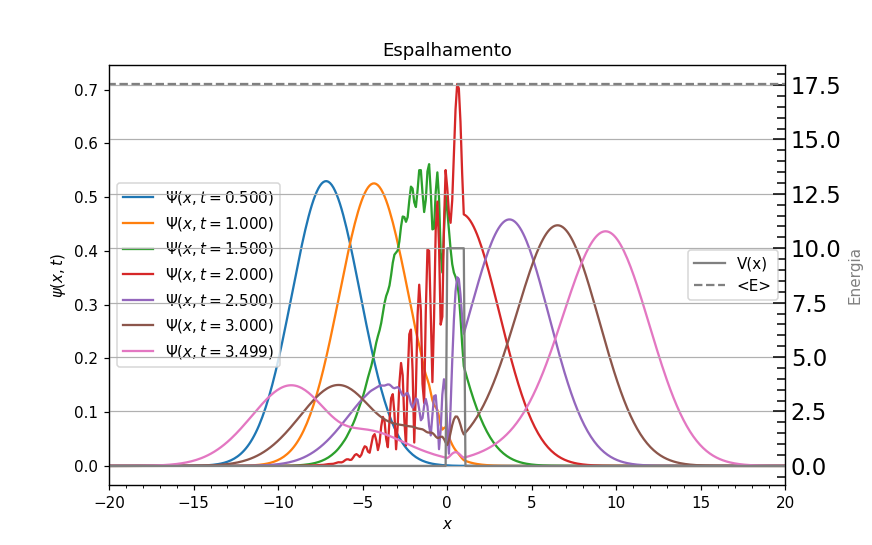

In [31]:
plt.figure(figsize=(8,5))

if vev_E0>max(V):
    plt.title('Espalhamento')
else:
    plt.title('Tunelamento')
plt.ylabel('$\psi(x,t)$')
plt.xlabel('$x$')
# plt.plot(x,np.abs(psi_t0)/np.sqrt(Delta_x),label="$\Psi(x,t=0)$")

for t,p in psi_tu:
    
    plt.plot(x,np.abs(p)/np.sqrt(Delta_x),label="$\Psi(x,t={:6.3f})$".format(t*dt))
    plt.legend(loc = 'center left')
    
ax1 = plt.twinx()
plt.plot(x,V,color="grey",label="V(x)")
plt.plot([x[0],x[N-1]],[vev_E0,vev_E0],color="grey",linestyle="--",label="<E>")
plt.ylabel("Energia",color="grey")
plt.xlim(g_x0-5*g_sig,-g_x0+5*g_sig)
plt.legend(loc='best')
plt.grid()
opt_plot()

plt.savefig('Estado deslocado.png')

### Cálculo prévio das estapas de 0.5 s.

Uma vantagem do cálculo direto do expoente é que é possível pré-calcular um passe de 0.5 tomando o produto de $\frac{0.5}{\Delta t}$ matrizes. Esta etapa será lenta, mas as subsequentes serão rápidas.

In [32]:
%time Ut_05s = np.linalg.matrix_power(Ut_mat,int(0.5/dt) )

Wall time: 59.5 s


Agora fazemos todas as etapas anteriores mais uma vez, entretanto, elas serão bem mais rápidas agora.

In [33]:
psi_t0 = psi0(x,g_x0,g_k0,g_sig)
psi_t1 = psi_t0
psi_tu05 = []

for t in range(7):
    psi_t1 = Ut_05s.dot(psi_t1)
    psi_tu05.append( (t,psi_t1))
    # psi_tu.append( (t,psi_t1))
print("Start")

for t,p in psi_tu05:
    norm = np.linalg.norm(p)
    vev_E1 = float(np.real(np.sum(np.conjugate(p)*H.dot(p))))
    vev_x1 = float(np.real(np.sum(np.conjugate(p)*x*p)))
    print("dt = {:7.1f}  norm = {:8.5f}  <E> = {:8.4f}  <x_(dt)> = {:8.4g}".format(t,norm,vev_E1,vev_x1))

Start
dt =     0.0  norm =  1.00001  <E> =  17.5432  <x_(dt)> =    -7.17
dt =     1.0  norm =  1.00001  <E> =  17.5434  <x_(dt)> =    -4.34
dt =     2.0  norm =  1.00002  <E> =  17.5436  <x_(dt)> =   -1.555
dt =     3.0  norm =  1.00003  <E> =  17.5439  <x_(dt)> =   0.8002
dt =     4.0  norm =  1.00003  <E> =  17.5441  <x_(dt)> =    2.905
dt =     5.0  norm =  1.00004  <E> =  17.5443  <x_(dt)> =    5.099
dt =     6.0  norm =  1.00004  <E> =  17.5446  <x_(dt)> =    7.305


Finalmente, vamos ao próximo plot:

<IPython.core.display.Javascript object>


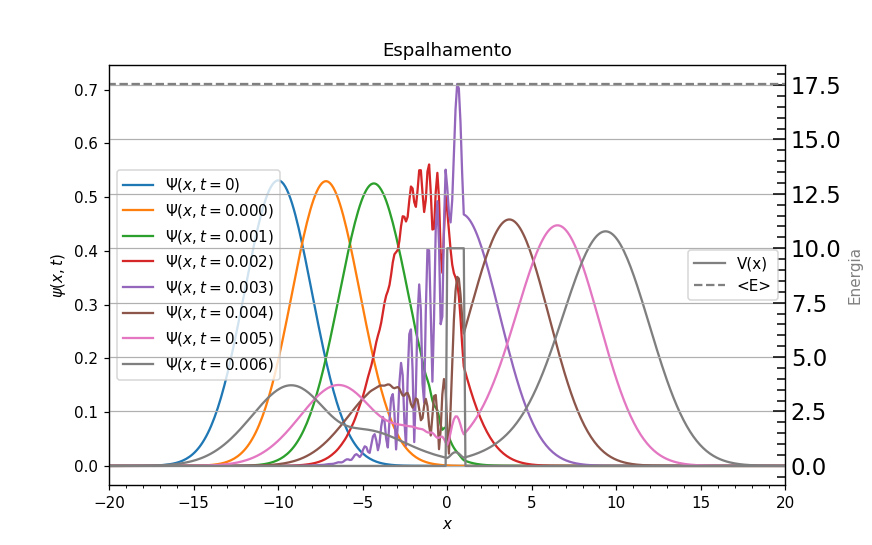

In [34]:
plt.figure(figsize=(8,5))

if vev_E0>max(V):
    plt.title('Espalhamento')
else:
    plt.title('Tunelamento')
plt.ylabel('$\psi(x,t)$')
plt.xlabel('$x$')
line, = plt.plot(x,np.abs(psi_t0)/np.sqrt(Delta_x),label="$\Psi(x,t=0)$")

for t,p in psi_tu05:
    plt.plot(x,np.abs(p)/np.sqrt(Delta_x),label="$\Psi(x,t={:6.3f})$".format(t*dt))
    plt.legend(loc='center left')
    
ax1 = plt.twinx()    
plt.plot(x,V,color="grey",label="V(x)")
plt.plot([x[0],x[N-1]],[vev_E0,vev_E0],color="grey",linestyle="--",label="<E>")
plt.ylabel("Energia",color="grey")
plt.xlim(g_x0-5*g_sig,-g_x0+5*g_sig)
plt.legend(loc='best')
plt.grid()
opt_plot()

plt.savefig('Estado deslocado - Pré-computados.png')

### Tempo fracionado : Avaliação do Momentum.

Ao invés de avaliá-lo diretamente, podemos dividir o operador em dois. Como $\text{op }H=-\frac{\hbar^{2}}{2m}\text{ op }p^{2}+V(x)$, é fácil ver que o operador de evolução temporal pode ser reescrito como sendo:

$$\text{op }U(t)=e^{\frac{-i\text{ op }Ht}{\hbar}}=e^{i\frac{\hbar}{2m}\text{ op }p^{2}t}\cdot e^{\frac{-iV(x)t}{\hbar}}$$

Note que o expoente com o potencial não contém derivadas, por isso é relativamente fácil de avaliá-lo numericamente. Na coordenada $x$ discretizada, $x_{i}$, obtemos para cada $i$ no espaço:

$$\Psi(x_{n},t+\Delta t)=\Psi(x_{n},t)e^{\frac{-iV(x_{i}\Delta t)}{\hbar}}$$

O termo *momentum* é mais complicado com base em $x$, uma vez que envolve derivadas. Tentar avalk=a-los diretamente leva à instabilidade de avaliar diretamente $U(t)$. Uma ideia interessante é que essa parte de $U(t)$ no *espaço de momentum* é muito mais fácil, pois agora não se tem mais uma derivada. Dessa forma, obtemos:

$$\tilde{\Psi}(p,t+\Delta t)=\tilde{\Psi}(p,t)\cdot e^{\frac{i\hbar p^{2}\Delta t}{2m}}$$

Tal ideia é interessante uma vez que é possível realizar a mudança de $\Psi$ para $\tilde{\Psi}$ de forma relativamente rápida usando a Transformada Rápida de Fourier (FFT). O único ponto que devemos ter uma certa cautela é com relação às constantes da FFT.

Podemos então descrever o algoritmo como:

* Pegue meio passo em $x$ : $\Psi_{n}=\Psi_{n}\cdot \text{exp}\big[\frac{-iV(x_{i})\Delta t}{2\hbar}\big]$;
* FFT para calcular $\tilde{\Psi}$ a partir de $\Psi$;
* Pgue um passo completo em $p$ : $\tilde{\Psi}_{m}=\tilde{\Psi}_{m}\cdot\text{exp}\big[\frac{i\hbar p^{2}\Delta t}{2m}\big]$;
* Pegue a inversa da FFT de $\tilde{\Psi}$ para  recuperar $\Psi$;
* Pegue o metade do passo final em $x$.

### Transformadas de Fourier

A tranformação entre a base $x$ e a base $p$ é feito com as seguintes integrais:

$$\tilde{\Psi}(p,t)=\frac{1}{\sqrt{2\pi\hbar}}\int_{-\infty}^{\infty}\Psi(x,t)\cdot e^{\frac{-ipx}{\hbar}}dx$$

$$\Psi(x,t)=\frac{1}{\sqrt{2\pi\hbar}}\int_{-\infty}^{\infty}\tilde{\Psi}(x,t)\cdot e^{\frac{-ipx}{\hbar}}dp$$

Para podermos realizar uma avliação numérica, precisamos pimeiro discretizá=los, ou seja, ir de $x$ contínuos para $x_{i}$ etapas discretas e em seguida limitar o domínio a $[x_{0},x_{N}]$ ap invés de $[-\infty,\infty]$. A matriz de valores de $x$ iria assim do ponto mais baixo no eixo $x$, $x_{0}$, para o ponto mais alto, $x_{N}$, em $N$ passos, com um tamanho de passo igual a $\Delta x=\frac{(x_{N}-x_{0})}{N}$, e $x_{n}=x_{0}+n\Delta x$. Observe, entretanto, que o últio ponto, $x_{N}$, é ignorado, pois começamos em $n=0$. Esse pequeno detalhe é o suficiente para não se preocupar com o mesmo.

Dado o exposto, a versão discreta de nossa primeira integral torna-se:

$$\tilde{\Psi}(p_{l},t)=\frac{1}{\sqrt{2\pi\hbar}}\sum_{n=0}^{N-1}F_{n}\cdot e^{\frac{-ip_{l}x_{n}}{\hbar}}\Delta x$$

O [algoritmo Numpy FFT](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html) executa uma versão rápida dessa soma:

$$\tilde{F}_{l}=\sum_{n=0}^{N-1}F_{n}\cdot e^{\frac{-i2\pi nl}{N}}$$

e a FFT inversa como sendo:

$$F_{n}=\frac{1}{N}\sum_{n=0}^{N-1}\tilde{F}_{l}\cdot e^{\frac{i2\pi nl}{N}}$$

Note que a normalização é assimétrica, que geralmente é usada com FFTs.

Para fazer com que isso seja o equivalente ao que desejamos, precisamos adotar o espaçamento de nossa matriz de espaço de *momentum* de forma que $k=\frac{p_{l}}{\hbar}=\frac{2\pi l}{(N\Delta x)}$, onde chamaremos isso de espaço-$k$ (ou $k$-*space*), que variará de $-\frac{\pi}{\Delta x}$ até $+\frac{\pi}{\Delta x}$, com um tamanho de etapas igual a $\Delta k=\frac{2\pi}{(N\Delta x)}$, então $k_{l}=k_{0}+l\Delta k=-\frac{\pi}{\Delta x}+\frac{2\pi l}{(N\Delta x)}$. Duas observações devem ser feitas aqui. Com a mudança de $p$ para $k$, pegamos um fator de $\hbar$ quando mudamos $dp$ para $\hbar dk$. Este fator pode ser distribuídos através das duas constantes, então $\frac{1}{\sqrt{2\pi}}$. Além disso, não obtemos cada $k$ de saída para o infinito; eliminamos o *momentum* muito alto (correspondente à alta frequência em $x$) em termos da função de onda. Isso pe exatamente o que se espera do [teorema de amostragem de Nyquist](https://www.sciencedirect.com/topics/engineering/nyquist-theorem) (consulte a referência [8] para mais informações).

O termo expoente, ao deixar $\frac{p_{l}}{\hbar}=k\rightarrow k_{0}+\frac{2\pi l}{(N\Delta x)}$ e $x_{n}\rightarrow x_{0}+n\Delta x$, então se torna:

$$\frac{-ip_{l}x_{n}}{\hbar}\rightarrow -i\Bigg[\frac{k_{0}+2\pi l}{N\Delta x)}(x_{0}+n\Delta x)\Bigg]=-ik_{0}x_{0}-\frac{i2\pi lx_{0}}{N\Delta x}+ik_{0}n\Delta x-\frac{i2\pi ln}{N}\implies$$

$$\implies-ik_{0}(x_{0}+n\Delta x)-il\Delta ka-\frac{i2\pi ln}{N}=-ik_{0}x_{n}-il\Delta kx_{0}-\frac{i2\pi ln}{N}$$

O último termo é o que desejamos. Então, quando pegamos a FFT, precisamos definir

$$F_{n}=\frac{\Delta x}{\sqrt{2\pi}}\cdot\Psi(x_{n},t)\cdot e^{-ik_{0}x_{n}}$$

A FFT então assume a seguinte forma:

$$\sum_{n=0}^{N-1}\Bigg[\frac{\Delta x}{\sqrt{2\pi}}\Psi(x_{n},t)\cdot e^{-ik_{0}x_{n}}\Bigg]\cdot e^{\frac{-i2\pi nl}{N}}=\tilde{\Psi}(k,t)\cdot e^{im\Delta kx_{0}}$$

e a FFT inversa será:

$$\frac{1}{N}\sum_{n=0}^{N-1}\Bigg[\tilde{\Psi}(k,t)\cdot e^{il\Delta kx_{0}}\Bigg]\cdot e^{\frac{-i2\pi nl}{N}}=\frac{\Delta x}{\sqrt{2\pi}}\cdot \Psi(x_{n},t)\cdot e^{-ik_{0}x_{n}}$$

Agora, como $\frac{\Delta x}{\sqrt{2\pi}}$ aparece na primeira equação e é retirado novamente na segunda, e como não nos importamos com a normalização de $\tilde{\Psi}(k,t)$, podemos ignorar esse fator.

### O Algoritmo baseado em FFT.

Vamos agora implementar o algoritmo para o operador $\text{op }U(t)$ como uma função, que tomará $\Delta t$ e $\Psi(x,t)$ como argumentos e retornará $\Psi(x,t+\Delta t)$. Ele obterá outros bits de informação, $V(x)$, $m$, $\hbar$, et, das variáveis globais. "Este não é o melhor design do ponto de vista do programador", pode estar pensando o leitor, bem, nesse caso você está certo. Caso o leitor deseje usar $\text{op }U(t)$ em um programa real, provavelmente vai desejar trnasformá-lo em uma classe, que irá armazenar todas as variáveis necessárias e tem vários métodos para manipular o funcionamento interno. De fato, realizar todas essas ações é muito melhor do ponto de vista do programador, entretanto, tais ações também obscurecem o cálculo, portanto, vamos amanter as coisas realmente simples por aqui, afinal, o intuito deste `Notebook` é, em sua essência, forncecer uma quantidade considerável de ferramentas e métodos que possam ajudar o leitor interessado no assunto a atingir o seu objetivo.

Prosseguindo, agora necessitamos de um espaço-$k$, bem como um espaço-$x$. Vamos definfi-los então:

In [35]:
n = np.arange(N)
k0 = -np.pi/Delta_x
kN =  np.pi/Delta_x
Delta_k = (kN-k0)/N
k = k0 + n*Delta_k 

g_x0=-10.
g_k0=6.
g_sig=2

Analogamente ao que fizemos anteriormente, definimos o Gaussiano no espaço-$k$:

In [36]:
def psi0(x,g_x0,g_k0,g_sig):
    _Norm_x=np.sqrt(Delta_x/g_sig)/(np.pi**0.25)
    
    return(_Norm_x*np.exp(-(x-g_x0)**2/(2.*g_sig*g_sig)+1j*g_k0*x))

psi_t0 = psi0(x,g_x0,g_k0,g_sig)

Agora vamos definir uma função que irá evoluir a função de onda em um valor `dt` e retornar a nova função de onda:

In [37]:
def Psi_Evolve(dt,psi0):
    #psi_scaled = Delta_x/np.sqrt(2*np.pi) *psi0* np.exp(-1j *k0*x)
    psi_scaled = psi0* np.exp(-1j *k0*x)
    
    # Dê metade do passo no espaço-x com psi_scaled
    psi_scaled *= np.exp(-1j*0.5*V*dt/hbar)
    phi_scaled = fft.fft(psi_scaled)
    
    # Dê o passo no espaço-k
    phi_scaled *= np.exp(-1j*hbar**3*k**2*dt/(2*m))
    psi_scaled = fft.ifft(phi_scaled)
    
    # Dê metade do passo no espaço-x com psi_scaled
    psi_scaled *= np.exp(-1j*0.5*V*dt/hbar)
    
    #psi_out = psi_scaled*np.sqrt(2*np.pi)/Delta_x * np.exp(+1j *k0*x)
    psi_out = psi_scaled* np.exp(+1j *k0*x)
    
    return(psi_out)

Caso desejemos realizar o processo em $N$ etapas de $\Delta t$, então, para etapas centrais, podemos combinar duas meias etapas em uma. Assim, obtemos o método para evoluir a função de onda em $N\times\Delta t$: 

In [38]:
def Psi_Evolve_N(dt,psi0,N):
    psi_scaled = psi0* np.exp(-1j *k0*x)
    
    # Dê metade do passo no espaço-x com psi_scaled
    psi_scaled *= np.exp(-1j*0.5*V*dt/hbar)
    
    # Agora damos N-1 vezes um passo em k, em seguida, um passo em x
    for i in range(N-1):     
        phi_scaled = fft.fft(psi_scaled)
        
        # Dê o passo no espaço-k
        phi_scaled *= np.exp(-1j*hbar**3*k**2*dt/(2*m))
        psi_scaled = fft.ifft(phi_scaled)
        psi_scaled *= np.exp(-1j*V*dt/hbar)
 
    phi_scaled = fft.fft(psi_scaled)
    
    # Dê último passo no espaço-k.
    phi_scaled *= np.exp(-1j*hbar**3*k**2*dt/(2*m))
    psi_scaled = fft.ifft(phi_scaled)
    
    # Dê a última metade do passo no espaço-x com psi_scaled
    psi_scaled *= np.exp(-1j*0.5*V*dt/hbar)
    
    #psi_out = psi_scaled*np.sqrt(2*np.pi)/Delta_x * np.exp(+1j *k0*x)
    psi_out = psi_scaled* np.exp(+1j *k0*x)
    
    return(psi_out)

Podemos agora tomar um estado inicial, um gaussiano, e propagá-lo no tempo por etapas de $\Delta t$. Como essa etapa é muito pequena, desejamos apenas manter alguns dos resutados para traçar. Note que economizamos a cada $500\Delta t=0.5$ segundos. Colocamos essas funções de onda resultantes em uma matriz para plotagem e teste.

In [39]:
psi_t0 = psi0(x,g_x0,g_k0,g_sig)
psi_t1 = psi_t0
psi_t = []

for i in range(7):
    t=i*500*dt
    psi_t1 = Psi_Evolve_N(dt,psi_t1,500)
    
    # for m in range(500):
        # psi_t1 = Psi_Evolve(dt,psi_t1)

    psi_t.append( (t,psi_t1))

Precisamos testar se nossos resultados  fazem sentido. Para isso, verificamos a normalização para cada etapa, o valor esperado da energia $<E>$ e o valor esperado da posição $<x>$. Espera-se que a posição aumente em $p\times t$, até atingir a barreira onde a onda se divide. Note que essa verificação é análoga à que fizemos anteriormente. 

In [40]:
print("Normalization: ",np.linalg.norm(psi_t[-1][1]))

vev_E0=float(np.real(np.sum(np.conjugate(psi_t0)*H.dot(psi_t0))))
vev_x0=float(np.real(np.sum(np.conjugate(psi_t0)*x*psi_t0)))

print("<E_(t = 0)> = {:8.4f}  <x_(t = 0)> = {:8.4f}".format(vev_E0,vev_x0))

for t,p in psi_t:
    norm = np.linalg.norm(p)
    vev_E1 = float(np.real(np.sum(np.conjugate(p)*H.dot(p))))
    vev_x1 = float(np.real(np.sum(np.conjugate(p)*x*p)))
    print("t = {:5.2f}  norm = {:8.5f}  <E> = {:8.4f}  <x_(dt)> = {:8.4g}".format(t,norm,vev_E1,vev_x1))

Normalization:  1.0000000000003935
<E_(t = 0)> =  17.5429  <x_(t = 0)> = -10.0000
t =  0.00  norm =  1.00000  <E> =  17.5429  <x_(dt)> =       -7
t =  0.50  norm =  1.00000  <E> =  17.5443  <x_(dt)> =   -4.001
t =  1.00  norm =  1.00000  <E> =  17.6316  <x_(dt)> =   -1.084
t =  1.50  norm =  1.00000  <E> =  17.6528  <x_(dt)> =    1.321
t =  2.00  norm =  1.00000  <E> =  17.5533  <x_(dt)> =    3.605
t =  2.50  norm =  1.00000  <E> =  17.5436  <x_(dt)> =    5.961
t =  3.00  norm =  1.00000  <E> =  17.5430  <x_(dt)> =    8.322


Agora, finalmente, plotamos as ondas resultantes:

In [41]:
print(N)

4096


<IPython.core.display.Javascript object>


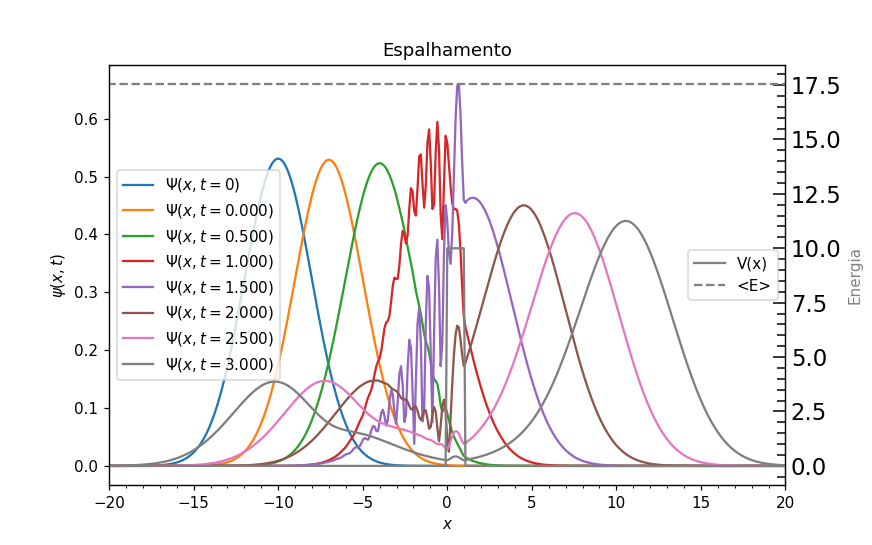

In [42]:
plt.figure(figsize=(8,5))

if vev_E0>max(V):
    plt.title('Espalhamento')
else:
    plt.title('Tunelamento')
plt.ylabel('$\psi(x,t)$')
plt.xlabel('$x$')
plt.plot(x,np.abs(psi_t0)/np.sqrt(Delta_x),label="$\Psi(x,t=0)$")

for t,p in psi_t:
    plt.plot(x,np.abs(p)/np.sqrt(Delta_x),label="$\Psi(x,t={:6.3f})$".format(t))
plt.legend(loc='center left')

ax1=plt.twinx()

plt.plot(x,V,color="grey",label="V(x)")
plt.plot([x[0],x[N-1]],[vev_E0,vev_E0],color="grey",linestyle="--",label="<E>")
plt.ylabel("Energia",color="grey")
plt.xlim(g_x0-5*g_sig,-g_x0+5*g_sig)
plt.legend(loc='best')
plt.grid()
opt_plot()

plt.savefig('Estado deslocado - Final.png')

### Criando um vídeo

Vamos agora "calcular" um vídeo. Na maioria das situações, o método FFT é mais rápido. Caso o leitor escolha um $N$ relativamente diminuto para sua grade e realizasse muitos passos (grandes) pré-calculados em $t$, talvez um passo pré-calculado vencesse. No fim, tudo depende do que você está fazendo e de qual método seria o mais adequado à situação na qual você se encontra. Abaixo está o método FFT, com o método pré-cálculo comentado.

A taxa de quadros (ou *frames*) é definida para 20 quadros/segundo (ou *20 frames/s*), mas diminuímos o tempo em um fator 2 para tornar o filme mais claro.

50


<IPython.core.display.Javascript object>


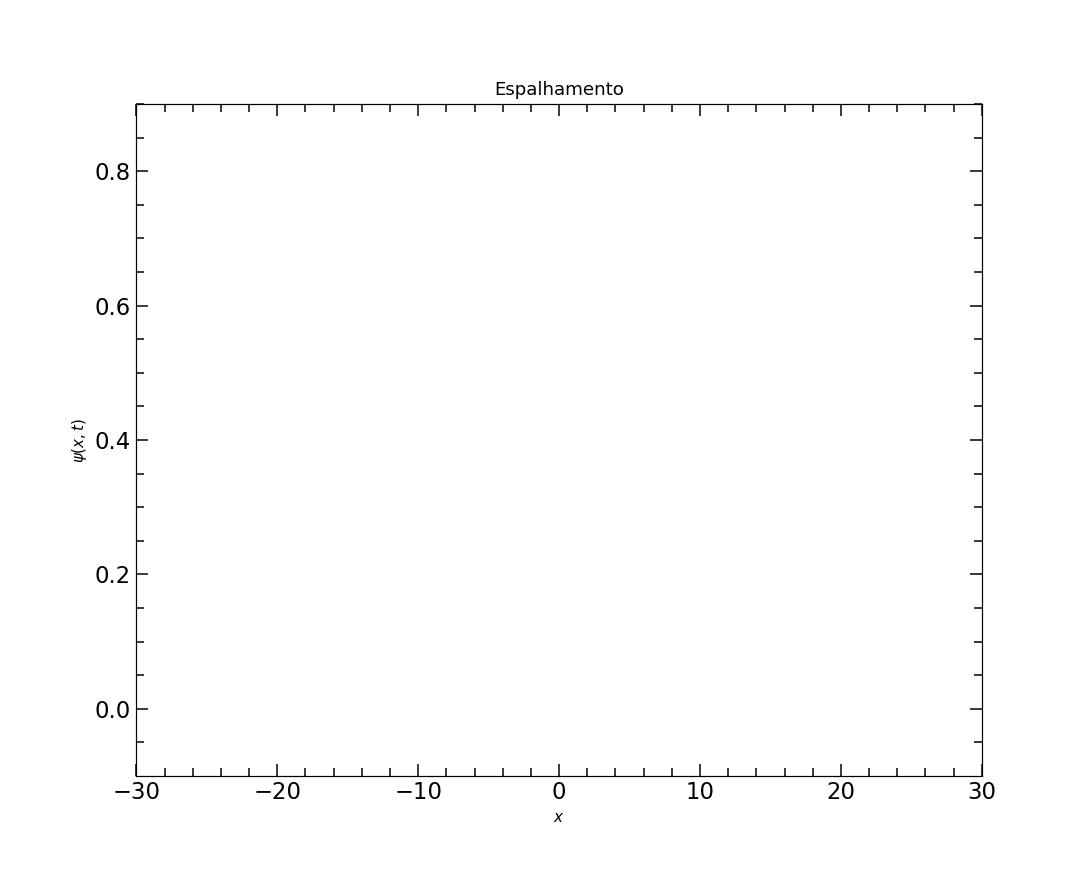

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [43]:
frame_rate = 20     # Taxa de quadros em HZ. Aumente para um filme mais suave, as leva mais tempo para calcular.
time_slowdown = 2   # Tempo de execução x vexes mais lento que o normal. Desejamos cerca de 10.
T=7.                # Tempo total para animar.
x_min = -30.
x_max = +30.

# %time Ut_1f = np.linalg.matrix_power(Ut_mat,int(1./frame_rate/dt))  
# Move a onda em um quadro de acordo com a taixa de quadros
print(int(1./frame_rate/dt))

psi_t0 = psi0(x,g_x0,g_k0,g_sig)
psi_t1 = psi_t0

plt.figure(figsize=(10,8))

if vev_E0 > max(V):
    plt.title('Espalhamento')
else:
    plt.title('Tunelamento')
    
ax1.grid()
opt_plot()
plt.ylabel('$\psi(x,t)$')
plt.xlabel('$x$')
plt.xlim(x_min,x_max)
plt.ylim(-0.1,0.9)
line, = plt.plot([],[],lw=2,color='red')

time_template = 'time = {:9.2f}s'
time_text = ax1.text(0.05, 0.73, '', transform=ax1.transAxes)


def init():
    ax1=plt.twinx()
    plt.plot(x,V,color="grey",label="V(x)")
    plt.plot([x[0],x[N-1]],[vev_E0,vev_E0],color="grey",linestyle="--",label="<E>")
    plt.ylabel("Energia",color="grey")
    plt.legend(loc='best')
    plt.xlim(x_min,x_max)
    plt.ylim(-0.1,0.9)
    line.set_data([], [])
    time_text.set_text(time_template.format(0.))
    
    return line, time_text

def animate(t):
    global psi_t1
    
    #psi_t1 = Ut_1f.dot(psi_t1)
    psi_t1 = Psi_Evolve_N(dt,psi_t1,int(1./frame_rate/dt))
    line.set_data(x,np.abs(psi_t1/np.sqrt(Delta_x)))
    time_text.set_text(time_template.format(t))
    
    return line,  time_text

ani = animation.FuncAnimation(fig, animate, np.linspace(0.,T,int(T*frame_rate)),
                              interval=time_slowdown*1000./frame_rate, blit=True, init_func=init)
HTML(ani.to_html5_video())

$\text{ }$

### Referências

[1] *Mark Newman - Computational Physics (2013, University of Michigan)* 

[2] *Nicholas J. Giordano; Hisao Nakanishi - Computational Physics (2005, Addison-Wesley,Second Edition)* 

[3] Resolução teórica do problema do poço quadrado infinito : https://phys.libretexts.org/Courses/University_of_California_Davis/UCD%3A_Physics_9HE_-_Modern_Physics/03%3A_One-Dimensional_Potentials/3.2%3A_Infinite_Square_Well

[4] *Huang, Young-Sea. (2015). Reexamination on the problem of the infinite square well in quantum mechanics. 10.13140/RG.2.1.1277.5843.* 

[5] *Resolvendo numericamente a equação de Schrödinger* : https://github.com/GabrielWendell/PET/blob/master/Notebooks/Resolvendo%20numericamente%20a%20equa%C3%A7%C3%A3o%20de%20Schr%C3%B6dinger.ipynb

[6] Sobre a FFT : https://www.sciencedirect.com/topics/engineering/fast-fourier-transform

[7] *Numerical Recipes 3rd edition 17.5* : https://e-maxx.ru/bookz/files/numerical_recipes.pdf

[8] Sobre o teorema de Nyquist : https://www.sciencedirect.com/topics/engineering/nyquist-theorem